In [1]:
#import dependencies
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import train_test_split
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Set path of input file
file_path = "Resources/US_Salary_Preprocessed_new_regions.csv"
#Read input file into a DataFrame
salaries_df = pd.read_csv(file_path)
salaries_df

,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
0,1.5,1.5,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5.0,3.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8.0,4.0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,13.0,2.0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44718,3.0,2.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44719,4.0,3.0,1,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44720,15.0,15.0,1,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44721,25.0,2.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
# Create our features
X = salaries_df.drop(["salary_level"], axis=1)

# Create our target
y= salaries_df[['salary_level']]


In [4]:
# Check the balance of our target values
y['salary_level'].value_counts()

5    12015
6    11177
4     8828
7     5472
3     3262
8     2485
2      762
9      661
1       61
Name: salary_level, dtype: int64

In [5]:
#Split out testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Balanced Random Forest 
### Same method as in Cryptocurrencies project

In [6]:
# Resample the training data with the BalancedRandomForestClassifier

brf_model = BalancedRandomForestClassifier(n_estimators=100).fit(X_train,y_train)

In [7]:
# Calculated the balanced accuracy score - BalancedRandomForestClassifier
y_pred = brf_model.predict(X_test)
balanced_accuracy_score(y_test, y_pred)

0.327842849346566

In [8]:
# Display the confusion matrix - BalancedRandomForestClassifier
confusion_matrix(y_test, y_pred)

array([[  9,   5,   2,   2,   0,   0,   2,   1,   1],
       [ 55,  81,  30,   2,   5,   1,   2,   3,   1],
       [170, 252, 247,  71,  24,  17,  11,  12,   8],
       [260, 214, 414, 717, 313, 102,  82,  55,  53],
       [228, 123, 322, 489, 866, 408, 207, 177, 181],
       [188,  46, 173, 197, 496, 636, 373, 342, 336],
       [ 73,  12,  43,  40,  89, 216, 309, 298, 303],
       [ 27,   1,  13,   9,  22,  54, 109, 182, 195],
       [  6,   0,   4,   7,   7,  19,  11,  46,  74]], dtype=int64)

In [9]:
# Print the imbalanced classification report - BalancedRandomForestClassifier
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          1       0.01      0.41      0.91      0.02      0.61      0.35        22
          2       0.11      0.45      0.94      0.18      0.65      0.40       180
          3       0.20      0.30      0.90      0.24      0.52      0.26       812
          4       0.47      0.32      0.91      0.38      0.54      0.28      2210
          5       0.48      0.29      0.88      0.36      0.50      0.24      3001
          6       0.44      0.23      0.90      0.30      0.45      0.19      2787
          7       0.28      0.22      0.92      0.25      0.45      0.19      1383
          8       0.16      0.30      0.91      0.21      0.52      0.25       612
          9       0.06      0.43      0.90      0.11      0.62      0.37       174

avg / total       0.39      0.28      0.90      0.31      0.50      0.24     11181



In [10]:
# List the features sorted in descending order by feature importance
importances = brf_model.feature_importances_
sorted(zip(brf_model.feature_importances_,X.columns),reverse=True)

[(0.2358193486513511, 'yearsofexperience'),
 (0.15040910596281065, 'yearsatcompany'),
 (0.14284095999195473, 'region'),
 (0.03701992899104533, 'title_Software Engineer'),
 (0.034661067190077284, 'Masters_Degree'),
 (0.032994585162991724, 'gender_Male'),
 (0.030217454705792974, 'company_Other'),
 (0.029895887057340084, 'gender_none'),
 (0.029868463705289627, 'Race_Asian'),
 (0.028935340733013407, 'title_Other'),
 (0.027925719385817914, 'Race_White'),
 (0.027164768658952575, 'Bachelors_Degree'),
 (0.021544855572014042, 'gender_Female'),
 (0.017102177495127404, 'company_Amazon'),
 (0.016408681910893518, 'title_Product Manager'),
 (0.015843410639027434, 'title_Software Engineering Manager'),
 (0.014394211484451518, 'company_Google'),
 (0.013214818329914436, 'company_Microsoft'),
 (0.012391661330970522, 'title_Data Scientist'),
 (0.009797673494991745, 'company_Facebook'),
 (0.009727100915137217, 'Doctorate_Degree'),
 (0.00939352561187181, 'title_Hardware Engineer'),
 (0.007934059152088674, 

## Random Forest
### Same coding as example from modules

In [11]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_test_scaled

array([[ 0.1104819 , -0.50032149, -0.57471097, ..., -1.10746794,
        -0.07705907, -0.6775759 ],
       [ 3.39472423,  4.82708499,  1.74000508, ...,  0.90296068,
        -0.07705907, -0.6775759 ],
       [-1.16672345, -0.81369835, -0.57471097, ..., -1.10746794,
        -0.07705907,  1.47584942],
       ...,
       [ 1.93506097,  0.12643221,  1.74000508, ...,  0.90296068,
        -0.07705907, -0.6775759 ],
       [ 1.57014516, -0.81369835, -0.57471097, ...,  0.90296068,
        -0.07705907, -0.6775759 ],
       [-0.07197601, -0.18694464,  1.74000508, ..., -1.10746794,
        -0.07705907, -0.6775759 ]])

In [12]:
# Creating the decision tree classifier instance
rf_model = RandomForestClassifier(n_estimators=128)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([6, 8, 4, ..., 7, 7, 6], dtype=int64)

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2","Actual 3","Actual 4","Actual 5","Actual 6","Actual 7","Actual 8","Actual 9"], columns=["Predicted 1", "Predicted 2","Predicted 3","Predicted 4","Predicted 5","Predicted 6","Predicted 7","Predicted 8","Predicted 9"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9
Actual 1,2,4,8,1,2,3,0,2,0
Actual 2,0,22,100,37,12,9,0,0,0
Actual 3,1,42,355,249,123,31,6,5,0
Actual 4,0,21,237,1040,611,233,54,12,2
Actual 5,1,2,109,551,1375,768,147,39,9
Actual 6,1,4,45,262,767,1278,317,97,16
Actual 7,1,0,11,74,203,532,417,132,13
Actual 8,0,0,2,18,80,212,178,108,14
Actual 9,0,0,0,8,20,62,47,26,11


Accuracy Score : 0.4121277166621948
Classification Report
              precision    recall  f1-score   support

           1       0.33      0.09      0.14        22
           2       0.23      0.12      0.16       180
           3       0.41      0.44      0.42       812
           4       0.46      0.47      0.47      2210
           5       0.43      0.46      0.44      3001
           6       0.41      0.46      0.43      2787
           7       0.36      0.30      0.33      1383
           8       0.26      0.18      0.21       612
           9       0.17      0.06      0.09       174

    accuracy                           0.41     11181
   macro avg       0.34      0.29      0.30     11181
weighted avg       0.40      0.41      0.41     11181



In [25]:
#Now run random forest with single employers
def random_forests(df):
    # Remove annual and base salaries from features data
    y = df.salary_level
    X = df.drop(columns=['salary_level'])
    # Split training/test datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

    # Create a StandardScaler instance
    scaler = StandardScaler()

    # Fit the StandardScaler
    X_scaler = scaler.fit(X_train)

    # Scale the data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    from sklearn.metrics import accuracy_score
    # Create a random forest classifier.
    rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

    # Fitting the model
    rf_model = rf_model.fit(X_train_scaled, y_train)

    # Evaluate the model
    y_pred = rf_model.predict(X_test_scaled)
    print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")
    
    from sklearn.metrics import confusion_matrix, classification_report
    matrix = confusion_matrix(y_test, y_pred)
    print(matrix)
    
    report = classification_report(y_test, y_pred)
    print(report)
    
    # Calculate feature importance in the Random Forest model.
    importances = rf_model.feature_importances_
    
    columns = X_train.columns

    rfGraph = pd.Series(importances, columns)
    
    figure(figsize=(10,10))
    rfGraph.sort_values().plot.barh(color="red")
    plt.title("Random Forest Model Feature Importances")

In [26]:
salaries_df.columns.tolist()

['yearsofexperience',
 'yearsatcompany',
 'Masters_Degree',
 'Bachelors_Degree',
 'Doctorate_Degree',
 'Highschool',
 'Some_College',
 'Race_Asian',
 'Race_White',
 'Race_Two_Or_More',
 'Race_Black',
 'Race_Hispanic',
 'region',
 'salary_level',
 'company_Amazon',
 'company_Apple',
 'company_Facebook',
 'company_Google',
 'company_Microsoft',
 'company_Other',
 'title_Data Scientist',
 'title_Hardware Engineer',
 'title_Other',
 'title_Product Designer',
 'title_Product Manager',
 'title_Software Engineer',
 'title_Software Engineering Manager',
 'title_Technical Program Manager',
 'gender_Female',
 'gender_Male',
 'gender_Other',
 'gender_none']

In [27]:
amazon_df = salaries_df.loc[salaries_df['company_Amazon']==1]
amazon_df = amazon_df.drop(columns=['company_Amazon','company_Microsoft','company_Google','company_Facebook','company_Apple',"company_Other"])
amazon_df

,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
27,14.0,1.0,0,1,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
93,1.0,1.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
98,11.0,2.0,1,0,0,0,0,1,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
99,16.0,2.0,1,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
125,0.0,0.0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44596,8.0,2.0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44602,9.0,2.0,0,1,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44610,5.0,2.0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44652,5.0,0.0,0,1,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
microsoft_df = salaries_df.loc[salaries_df['company_Microsoft']==1]
microsoft_df = microsoft_df.drop(columns=['company_Amazon','company_Microsoft','company_Google','company_Facebook','company_Apple',"company_Other"])
microsoft_df

,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
28,17.0,16.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
174,0.0,0.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
190,0.0,0.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
199,2.0,0.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
214,0.0,0.0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44528,22.0,8.0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44537,9.0,9.0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44550,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44667,7.0,1.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [29]:
google_df = salaries_df.loc[salaries_df['company_Google']==1]
google_df = google_df.drop(columns=['company_Amazon','company_Microsoft','company_Google','company_Facebook','company_Apple','company_Other'])
google_df

,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
227,2.0,1.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
228,0.0,0.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
245,3.0,0.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
248,30.0,1.0,1,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
266,18.0,4.0,1,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44040,20.0,6.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
44299,7.0,1.0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
44446,5.0,2.0,0,1,0,0,0,0,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44675,2.0,0.0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [30]:
facebook_df = salaries_df.loc[salaries_df['company_Facebook']==1]
facebook_df = facebook_df.drop(columns=['company_Amazon','company_Microsoft','company_Google','company_Facebook','company_Apple','company_Other'])
facebook_df

,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
851,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1056,5.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1092,7.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1104,0.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1212,4.0,0.0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44607,7.0,0.0,0,1,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
44639,3.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
44679,5.0,0.0,0,1,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
44680,6.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
apple_df = salaries_df.loc[salaries_df['company_Apple']==1]
apple_df = apple_df.drop(columns=['company_Amazon','company_Microsoft','company_Google','company_Facebook','company_Apple','company_Other'])
apple_df

,yearsofexperience,yearsatcompany,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,...,title_Other,title_Product Designer,title_Product Manager,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,gender_Female,gender_Male,gender_Other,gender_none
720,15.0,5.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
723,10.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
764,1.0,1.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
776,8.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
784,8.0,5.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42856,10.0,1.0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
42859,5.0,1.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
42870,11.0,3.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43039,1.0,0.0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


 Random forest predictive accuracy: 0.535
[[  0   0   0   0   1   0   0   0   0]
 [  0   2   4   0   4   1   0   0   0]
 [  0   2  13   7   8   4   0   1   0]
 [  0   2  16 150  72  24   1   2   0]
 [  0   1   2  51 289 145   8   4   1]
 [  0   0   2  29 137 258  13   5   0]
 [  0   0   0   5  17  32  13   2   0]
 [  0   0   1   2   3  10   0   1   0]
 [  0   0   0   1   5   5   1   0   1]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.29      0.18      0.22        11
           3       0.34      0.37      0.36        35
           4       0.61      0.56      0.59       267
           5       0.54      0.58      0.56       501
           6       0.54      0.58      0.56       444
           7       0.36      0.19      0.25        69
           8       0.07      0.06      0.06        17
           9       0.50      0.08      0.13        13

    accuracy                           0.54      1358
   macro a

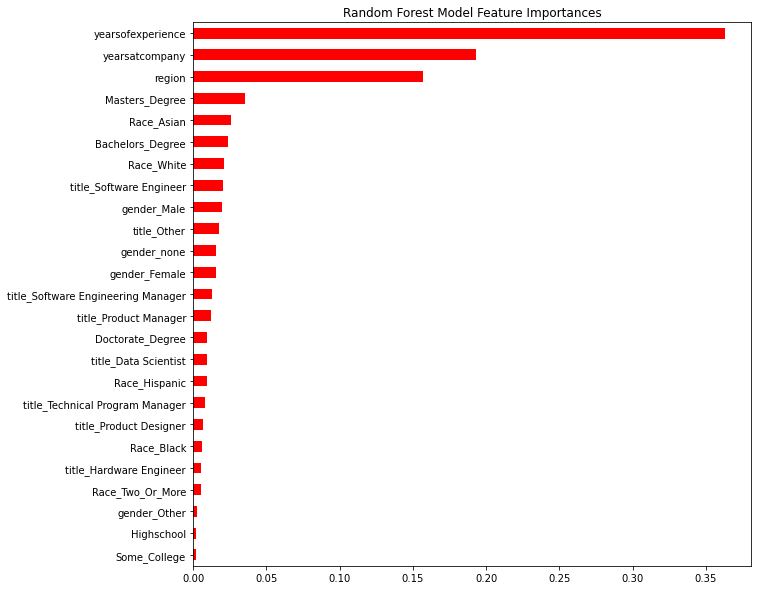

In [32]:
random_forests(amazon_df)

 Random forest predictive accuracy: 0.549
[[  0   0   0   0   0   0   1   0]
 [  0   0   3   5   0   0   0   0]
 [  0   0 189  63   6   1   0   0]
 [  0   0  48 177  75  11   3   0]
 [  0   0   8  64 137  40   6   3]
 [  0   0   1  13  57  49  14   0]
 [  1   0   1   1  19  19  24   0]
 [  0   0   0   1   1   5   3   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         8
           4       0.76      0.73      0.74       259
           5       0.55      0.56      0.55       314
           6       0.46      0.53      0.50       258
           7       0.39      0.37      0.38       134
           8       0.47      0.37      0.41        65
           9       0.00      0.00      0.00        10

    accuracy                           0.55      1049
   macro avg       0.33      0.32      0.32      1049
weighted avg       0.54      0.55      0.55      1049



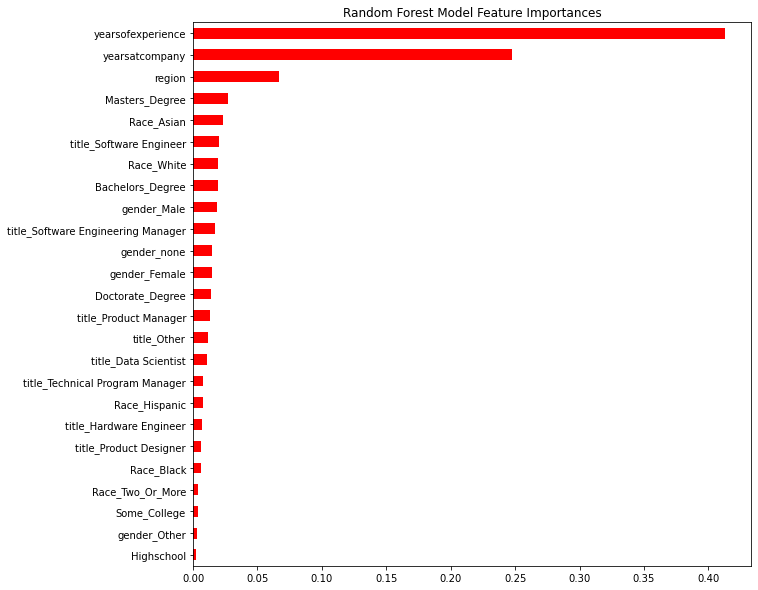

In [33]:
random_forests(microsoft_df)

In [36]:
#Some salary_level group in apple_df has only one member which is bombing the whole thing
#Find them and remove them
apple_df['salary_level'].value_counts()


6    480
5    458
7    342
8    126
4    123
9     20
3      8
2      1
Name: salary_level, dtype: int64

In [43]:
apple_df['salary_level'].loc[apple_df['salary_level']==2]

2031    2
Name: salary_level, dtype: int64

In [44]:
apple_df.drop(2031,inplace=True)

 Random forest predictive accuracy: 0.428
[[ 0  1  1  0  0  0  0]
 [ 0 11 11  4  3  2  0]
 [ 0 21 51 34  8  1  0]
 [ 0  2 28 57 26  7  0]
 [ 0  0  8 31 41  6  0]
 [ 0  0  3 12  9  6  1]
 [ 0  0  1  1  2  0  1]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.31      0.35      0.33        31
           5       0.50      0.44      0.47       115
           6       0.41      0.47      0.44       120
           7       0.46      0.48      0.47        86
           8       0.27      0.19      0.23        31
           9       0.50      0.20      0.29         5

    accuracy                           0.43       390
   macro avg       0.35      0.31      0.32       390
weighted avg       0.43      0.43      0.42       390



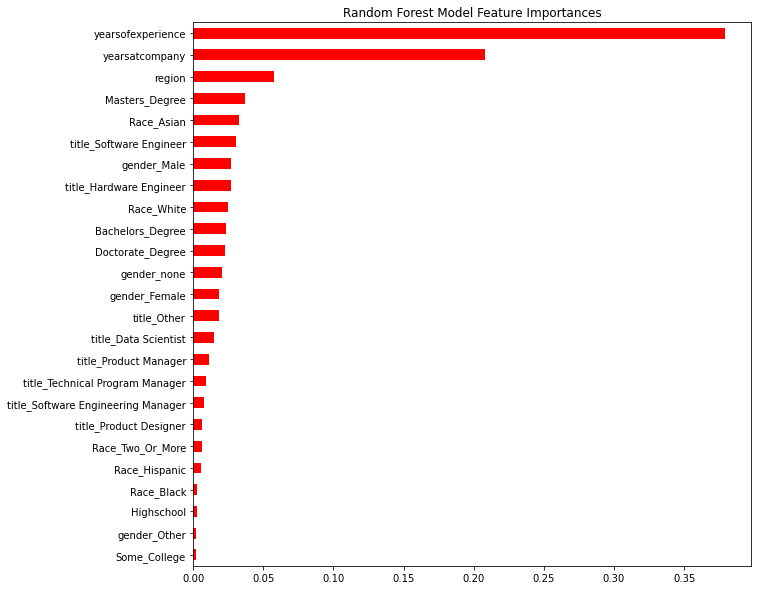

In [45]:
random_forests(apple_df)

 Random forest predictive accuracy: 0.528
[[  0   0   1   0   0   0   0   0]
 [  0   0   1   1   0   2   0   0]
 [  0   1  65   4   8   0   0   0]
 [  0   0   7   4  23   5   0   0]
 [  0   1  14   6 113  22   7   1]
 [  0   0   2   6  38  44  15   0]
 [  0   0   2   0  18  16   7   1]
 [  0   0   2   0   2   1   1   0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         4
           4       0.69      0.83      0.76        78
           5       0.19      0.10      0.13        39
           6       0.56      0.69      0.62       164
           7       0.49      0.42      0.45       105
           8       0.23      0.16      0.19        44
           9       0.00      0.00      0.00         6

    accuracy                           0.53       441
   macro avg       0.27      0.28      0.27       441
weighted avg       0.49      0.53      0.50       441



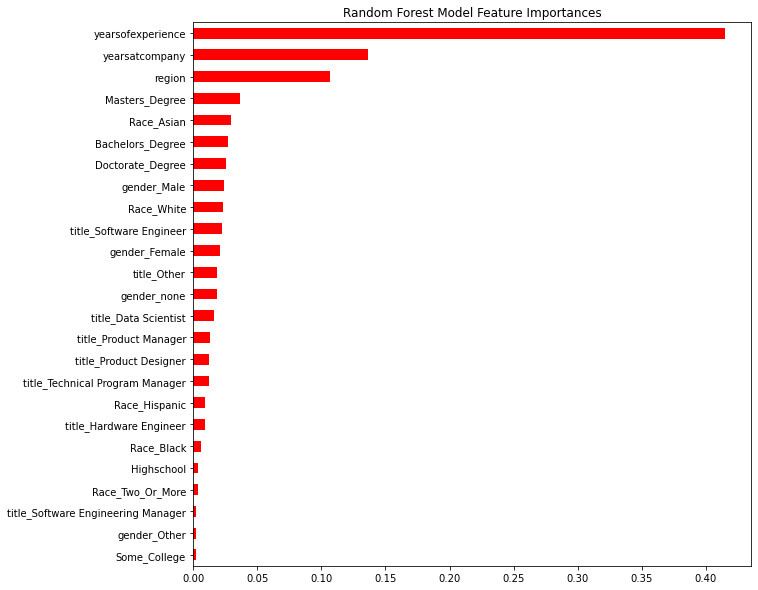

In [46]:
random_forests(facebook_df)

 Random forest predictive accuracy: 0.510
[[  0   0   0   0   0   1   0   0   0]
 [  0   0   0   1   1   1   0   0   0]
 [  0   0   2   4   3   0   0   0   0]
 [  0   0   2  56  39  14   2   2   0]
 [  0   0   0  24 146  66   7   2   0]
 [  0   0   0  11  58 135  22   1   0]
 [  0   0   0   4  12  47  33   5   0]
 [  0   0   0   0   6  15   6   5   1]
 [  0   0   0   1   2   1   0   1   0]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         3
           3       0.50      0.22      0.31         9
           4       0.55      0.49      0.52       115
           5       0.55      0.60      0.57       245
           6       0.48      0.59      0.53       227
           7       0.47      0.33      0.39       101
           8       0.31      0.15      0.20        33
           9       0.00      0.00      0.00         5

    accuracy                           0.51       739
   macro a

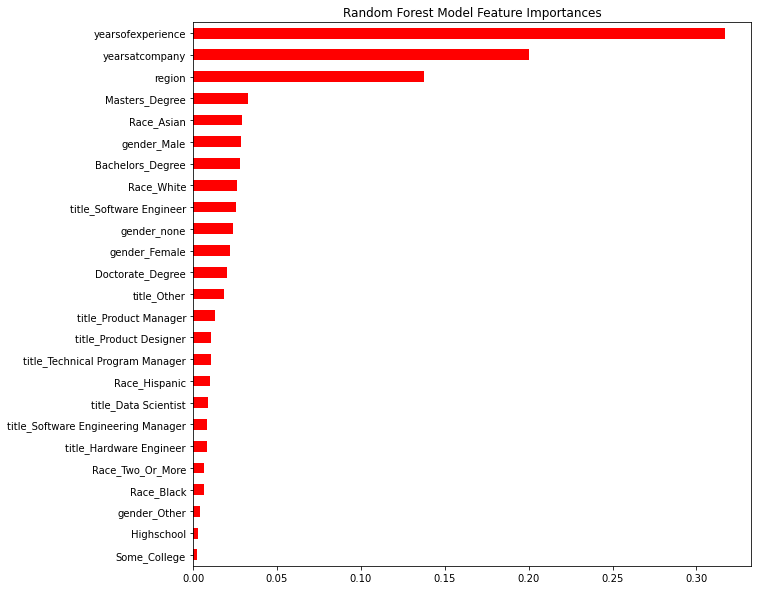

In [47]:
random_forests(google_df)